<a href="https://colab.research.google.com/github/Saber1875/Edge-Project/blob/main/Final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:


# Task 1: Data Collection and Storage
# Simulating a CSV file with student performance data

import pandas as pd
data = {
    'Student Name': ['Zahid Hasan', 'Tofael Azad', 'Abid Oshin', 'Naimul Dishan', 'Mehrab Apu', 'Yabid Hasan', 'Afsan HAque', 'Tahmim Mahfuz', 'Kowshik Niloy', 'Sakib Kayes'],
    'Student ID': ['STU-1001', 'STU-1002', 'STU-1003', 'STU-1004', 'STU-1005', 'STU-1006', 'STU-1007', 'STU-1008', 'STU-1009', 'STU-1010'],
    'Subject': ['Math', 'English', 'Science', 'Math', 'English', 'Science', 'Math', 'English', 'Science', 'Math'],
    'Score': ['85', '90', '78', '88', '65', '72', '89', '92', '68', '80'],
    'Attendance Percentage': [95, 82, 74, 88, 65, 50, 85, 92, 70, 80],
    'Assignment Completion': ['Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes']
}

# Create a DataFrame and save to CSV
student_df = pd.DataFrame(data)
student_df.to_csv('student_data.csv', index=False)
print("Data saved to 'student_data.csv'")


Data saved to 'student_data.csv'


In [29]:
# Task 2: Basic Data Handling
# Reading the CSV file
data = pd.read_csv('student_data.csv')

# Display the loaded data
print("Data loaded:")
print(data)



Data loaded:
    Student Name Student ID  Subject  Score  Attendance Percentage  \
0    Zahid Hasan   STU-1001     Math     85                     95   
1    Tofael Azad   STU-1002  English     90                     82   
2     Abid Oshin   STU-1003  Science     78                     74   
3  Naimul Dishan   STU-1004     Math     88                     88   
4     Mehrab Apu   STU-1005  English     65                     65   
5    Yabid Hasan   STU-1006  Science     72                     50   
6    Afsan HAque   STU-1007     Math     89                     85   
7  Tahmim Mahfuz   STU-1008  English     92                     92   
8  Kowshik Niloy   STU-1009  Science     68                     70   
9    Sakib Kayes   STU-1010     Math     80                     80   

  Assignment Completion  
0                   Yes  
1                   Yes  
2                    No  
3                   Yes  
4                    No  
5                    No  
6                   Yes  
7       

In [30]:
# Task 3: Data Analysis and Manipulation
# Convert 'Score' to integers
data['Score'] = data['Score'].astype(int)

# Calculate average, minimum, and maximum scores per student
average_score = data.groupby('Student Name')['Score'].mean()
min_score = data.groupby('Student Name')['Score'].min()
max_score = data.groupby('Student Name')['Score'].max()

print("Average Scores per Student:")
print(average_score)

print("Minimum Scores per Student:")
print(min_score)

print("Maximum Scores per Student:")
print(max_score)

# Identify students with attendance < 75%
low_attendance = data[data['Attendance Percentage'] < 75]
print("Students with Attendance < 75%:")
print(low_attendance)

# Identify students with missing assignments
missing_assignments = data[data['Assignment Completion'] == 'No']
print("Students with Missing Assignments:")
print(missing_assignments)


Average Scores per Student:
Student Name
Abid Oshin       78.0
Afsan HAque      89.0
Kowshik Niloy    68.0
Mehrab Apu       65.0
Naimul Dishan    88.0
Sakib Kayes      80.0
Tahmim Mahfuz    92.0
Tofael Azad      90.0
Yabid Hasan      72.0
Zahid Hasan      85.0
Name: Score, dtype: float64
Minimum Scores per Student:
Student Name
Abid Oshin       78
Afsan HAque      89
Kowshik Niloy    68
Mehrab Apu       65
Naimul Dishan    88
Sakib Kayes      80
Tahmim Mahfuz    92
Tofael Azad      90
Yabid Hasan      72
Zahid Hasan      85
Name: Score, dtype: int64
Maximum Scores per Student:
Student Name
Abid Oshin       78
Afsan HAque      89
Kowshik Niloy    68
Mehrab Apu       65
Naimul Dishan    88
Sakib Kayes      80
Tahmim Mahfuz    92
Tofael Azad      90
Yabid Hasan      72
Zahid Hasan      85
Name: Score, dtype: int64
Students with Attendance < 75%:
    Student Name Student ID  Subject  Score  Attendance Percentage  \
2     Abid Oshin   STU-1003  Science     78                     74   
4    

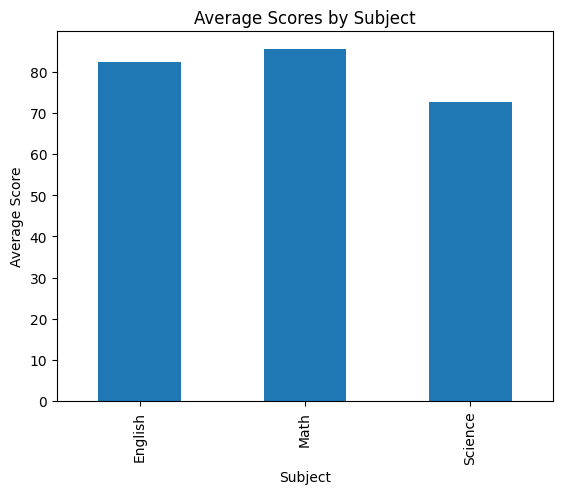

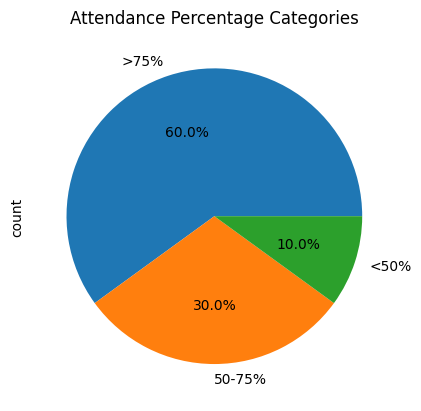

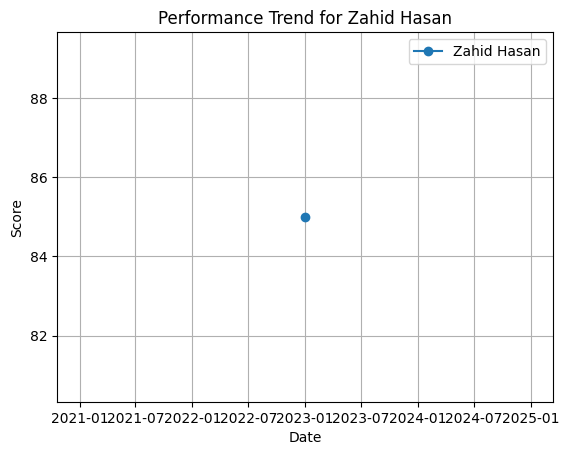

In [31]:
# Task 4: Visualization
# Bar chart of average scores by subject
avg_subject_scores = data.groupby('Subject')['Score'].mean()
avg_subject_scores.plot(kind='bar', title='Average Scores by Subject')
plt.xlabel('Subject')
plt.ylabel('Average Score')
plt.show()

# Pie chart of attendance percentage categories
categories = ['<50%', '50-75%', '>75%']
data['Attendance Category'] = pd.cut(data['Attendance Percentage'], bins=[0, 50, 75, 100], labels=categories)
attendance_counts = data['Attendance Category'].value_counts()
attendance_counts.plot(kind='pie', autopct='%1.1f%%', title='Attendance Percentage Categories')
plt.show()

# Line graph showing performance trends over time for a selected student
# Example assumes data contains a 'Date' column with performance records over time
data['Date'] = pd.date_range(start='2023-01-01', periods=len(data))  # Adding example dates
def plot_performance_trend(student_name):
    student_data = data[data['Student Name'] == student_name]
    plt.plot(student_data['Date'], student_data['Score'], marker='o', label=student_name)
    plt.title(f'Performance Trend for {student_name}')
    plt.xlabel('Date')
    plt.ylabel('Score')
    plt.legend()
    plt.grid()
    plt.show()

# Plotting performance trend for Zahid Hasan
plot_performance_trend('Zahid Hasan')


In [32]:
# Task 5: Applying Functions and Logic
# Function to calculate aggregate scores for each student
def calculate_aggregate(scores):
    return scores.sum()

# Apply the function
data['Aggregate Score'] = data.groupby('Student Name')['Score'].transform(calculate_aggregate)

# Function to determine grades based on scoring criteria
def determine_grade(score):
    if score >= 90:
        return 'A'
    elif score >= 75:
        return 'B'
    elif score >= 60:
        return 'C'
    else:
        return 'Fail'

data['Grade'] = data['Score'].apply(determine_grade)
print("Data with grades:")
print(data)

Data with grades:
    Student Name Student ID  Subject  Score  Attendance Percentage  \
0    Zahid Hasan   STU-1001     Math     85                     95   
1    Tofael Azad   STU-1002  English     90                     82   
2     Abid Oshin   STU-1003  Science     78                     74   
3  Naimul Dishan   STU-1004     Math     88                     88   
4     Mehrab Apu   STU-1005  English     65                     65   
5    Yabid Hasan   STU-1006  Science     72                     50   
6    Afsan HAque   STU-1007     Math     89                     85   
7  Tahmim Mahfuz   STU-1008  English     92                     92   
8  Kowshik Niloy   STU-1009  Science     68                     70   
9    Sakib Kayes   STU-1010     Math     80                     80   

  Assignment Completion Attendance Category       Date  Aggregate Score Grade  
0                   Yes                >75% 2023-01-01               85     B  
1                   Yes                >75% 2023-01

In [27]:
# Task 6: Exception Handling and Regular Expressions
import re

def validate_student_id(student_id):
    pattern = r"^STU-\\d{4}$"
    return bool(re.match(pattern, student_id))

# Example validation
print("Validating student IDs:")
for sid in data['Student ID']:
    print(f"{sid}: {validate_student_id(sid)}")


Validating student IDs:
STU-1001: False
STU-1002: False
STU-1003: False
STU-1004: False
STU-1005: False
STU-1006: False
STU-1007: False
STU-1008: False
STU-1009: False
STU-1010: False


In [35]:
# Task 7: Interactive Console Input/Output
# Function to add new student data
def add_new_student():
    name = input("Enter student name: ")
    student_id = input("Enter student ID: ")
    subject = input("Enter subject: ")
    score = int(input("Enter score: "))
    attendance = int(input("Enter attendance percentage: "))
    assignment = input("Assignment completed? (Yes/No): ")

    new_row = {
        'Student Name': name,
        'Student ID': student_id,
        'Subject': subject,
        'Score': score,
        'Attendance Percentage': attendance,
        'Assignment Completion': assignment
    }
    return new_row
